In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
data = pd.read_csv('Startups_data.csv')
print(data.head())

   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94


In [4]:
data.shape

(50, 5)

In [5]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [7]:
# Prepare data
X = data[['R&D Spend', 'Administration', 'Marketing Spend']].values
Y = data['Profit'].values

In [8]:
# Spilt Data into Training and Testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

In [9]:
#Build and train the Multiple Linear Regression
regression = LinearRegression()
regression.fit(X_train, Y_train)

LinearRegression()

In [10]:
# Make Predictions
Y_pred = regression.predict(X_test)

In [11]:
df = pd.DataFrame({'Actual':Y_test, 'Predicted' : Y_pred})
df1=df.head(10)
df1

,Actual,Predicted
0,103282.38,103901.896970
1,144259.40,132763.059931
2,146121.95,133567.903700
3,77798.83,72911.789767
4,191050.39,179627.925672
5,105008.31,115166.648648
6,81229.06,67113.576906
7,97483.56,98154.806868
8,110352.25,114756.115552
9,166187.94,169064.014088


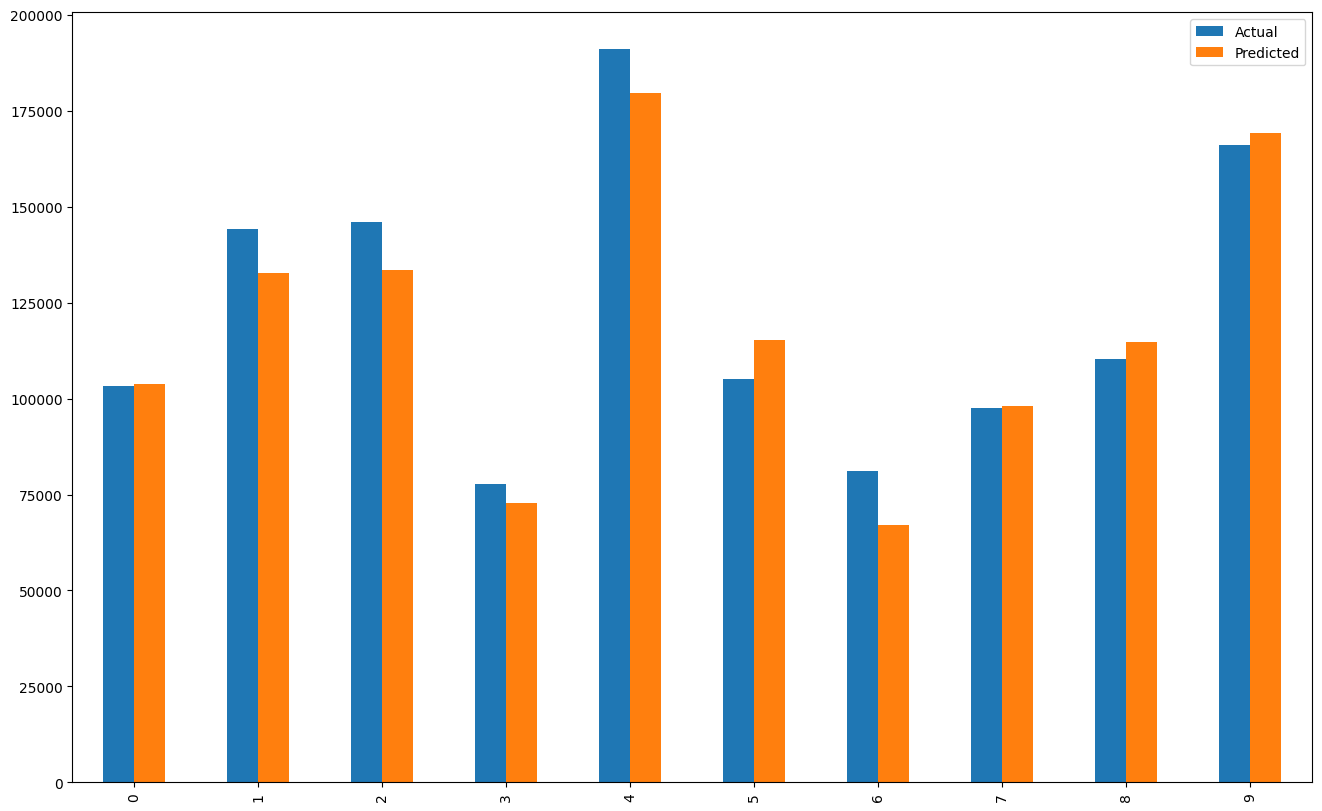

In [12]:
df1.plot(kind='bar', figsize = (16,10))
plt.show()

In [14]:
# Evaluate Model
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))

Mean Absolute Error: 7320.44161484813
Mean Squared Error: 77506468.16885415


In [16]:
coefficients = regression.coef_
intercept = regression.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [0.77884104 0.0293919  0.03471025]
Intercept: 42989.00816508671
